# Block Ciphers

In [1]:
from blockciphers import aes_image_encryption, aes_mcs_diffusion
from Crypto.Cipher import AES
import os
# from matplotlib.image import imread, imsave
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import hamming

## AES

In [2]:
# Open the PNG image
image_path = 'image.png'

# Generate a random 128 bits key
random_key = os.urandom(16)

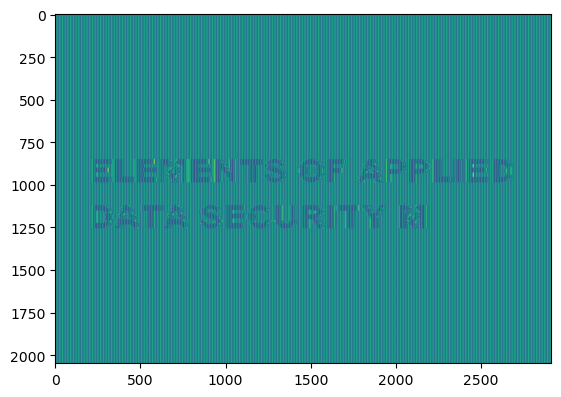

In [3]:
# Instantiate AES with ECB mode of operation
aes_ecb = AES.new(random_key, AES.MODE_ECB)
# Encrypt the image
aes_image_encryption(aes_ecb, image_path)

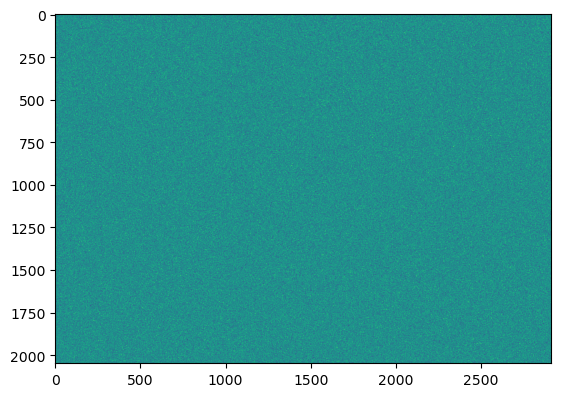

In [4]:
# Instantiate AES with CBC mode of operation
aes_cbc = AES.new(random_key, AES.MODE_CBC)
# Encrypt the image
aes_image_encryption(aes_cbc, image_path)

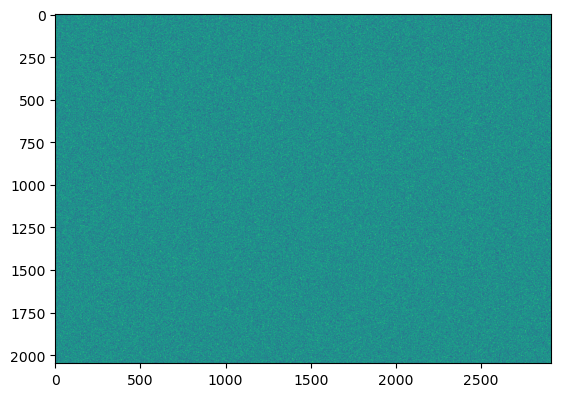

In [5]:
# Instantiate AES with CFB mode of operation
aes_cfb= AES.new(random_key, AES.MODE_CFB)
# Encrypt the image
aes_image_encryption(aes_cfb, image_path)

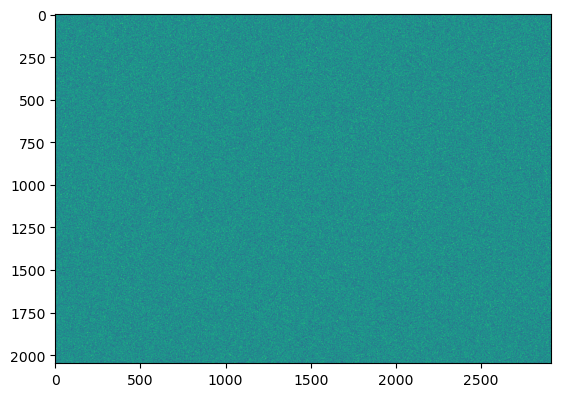

In [6]:
# Instantiate AES with CTR mode of operation
aes_ctr = AES.new(random_key, AES.MODE_CTR)
# Encrypt the image
aes_image_encryption(aes_ctr, image_path)

## Monte Carlo Simulation

### $\pi$ estimation


Text(0.5, 1.0, 'Error vs Number of points')

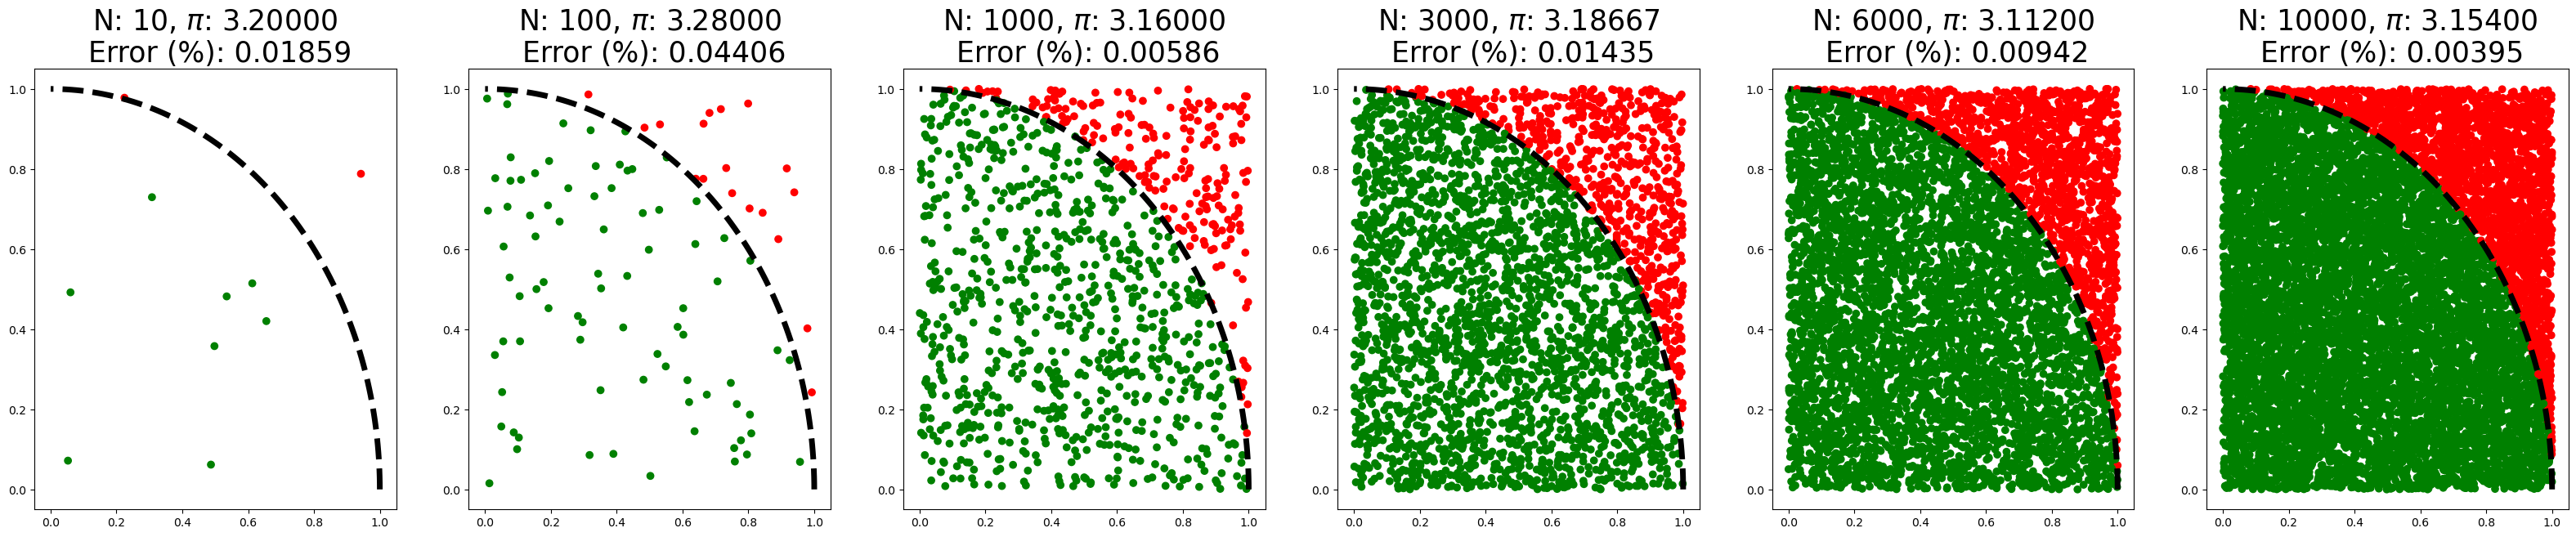

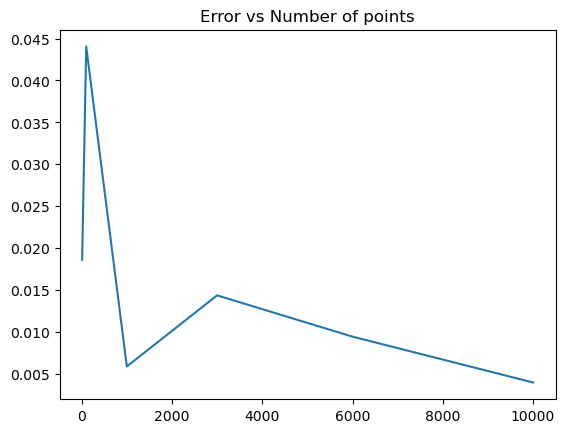

In [7]:
n_points = [10, 100, 1000, 3000, 6000, 10000]
fig1, axs1 = plt.subplots(1, len(n_points), figsize=(40, 7))
theta = np.linspace(0, np.pi/2, 100)  # Theta values from 0 to pi/2
x_circle = np.cos(theta)
y_circle = np.sin(theta)
pi_est = []
err = []
for a, n in enumerate(n_points):
    circle_points = 0
    colors = []
    x_coord = np.random.rand(n)
    y_coord = np.random.rand(n)
    for j in range(n):
        if np.linalg.norm((x_coord[j], y_coord[j])) < 1:
            colors.append('green')
            circle_points += 1
        else:
            colors.append('red')
    pi_est.append(4*circle_points/n)
    err.append(np.abs(pi_est[a] - np.pi)/np.pi)
    axs1[a].scatter(x_coord, y_coord, c=colors)
    axs1[a].plot(x_circle, y_circle, linestyle='--', linewidth=5, color='black')
    axs1[a].set_title(f'N: {n}, $\pi$: {pi_est[a]:.5f}\n Error (%): {err[a]:.5f}', fontsize = 25)
plt.figure(2)
plt.plot(n_points, err)
plt.title('Error vs Number of points')

## AES Diffusion and Confusion

ECB Mode of OPeration is uses since it offers a more "direct" relation between plaintext-key and ciphertext

### Diffusion evaluation

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59],
 [Text(0, 0, '20-21'),
  Text(1, 0, '21-22'),
  Text(2, 0, '22-23'),
  Text(3, 0, '23-24'),
  Text(4, 0, '24-25'),
  Text(5, 0, '25-26'),
  Text(6, 0, '26-27'),
  Text(7, 0, '27-28'),
  Text(8, 0, '28-29'),
  Text(9, 0, '29-30'),
  Text(10, 0, '30-31'),
  Text(11, 0, '31-32'),
  Text(12, 0, '32-33'),
  Text(13, 0, '33-34'),
  Text(14, 0, '34-35'),
  Text(15, 0, '35-36'),
  Text(16, 0, '36-37'),
  Text(17, 0, '37-38'),
  Text(18, 0, '38-39'),
  Text(19, 0, '39-40'),
  Text(20, 0, '40-41'),
  Text(21, 0, '41-42'),
  Text(22, 0, '42-43'),
  Text(23, 0, '43-44'),
  Text(24, 0, '44-45'),
  Text(25, 0, '45-46'),
  Text(26, 0, '46-47'),
  Text(27, 

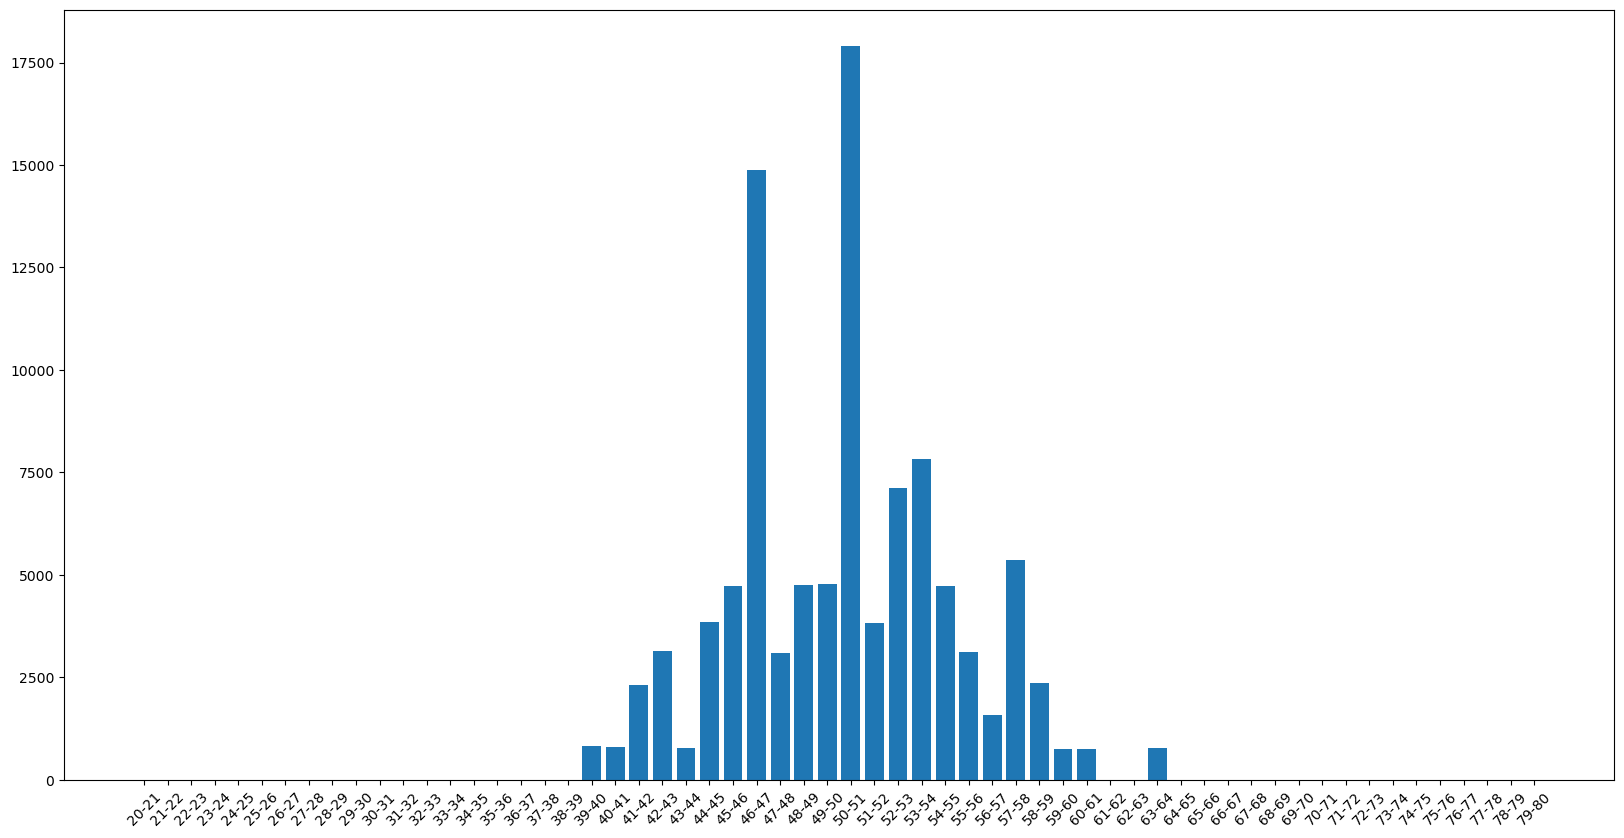

In [28]:
iterations = 100000

# Generate a random 128 bits key
key = os.urandom(AES.key_size[0])

aes_ecb = AES.new(key, AES.MODE_ECB)
# Generate a random 128 bits plaintext
ref_plaintext = os.urandom(AES.block_size)
# Encrypt the plaintext
ref_ciphertext = bytearray(aes_ecb.encrypt(ref_plaintext))

dist = aes_mcs_diffusion(aes_ecb, ref_plaintext, ref_ciphertext, iterations)

diff_dict = {f"{i}-{i+1}": 0 for i in range(20, 80)}
for value in dist:
    for i in range(0, 80):
        if i <= value < i + 1:
            diff_dict[f"{i}-{i+1}"] += 1
            break 
plt.figure(figsize=(20,10))
plt.bar(diff_dict.keys(), diff_dict.values())
plt.xticks(rotation=45)